# Harassment Detection Model Project #

# 1. Preparing The Tools ##

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2. Load the Dataset ##

In [2]:
data = pd.read_csv("youtoxic_english_1000.csv")
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
columns_to_keep = ['Text', 'IsToxic']

In [4]:
adjusted_data = data[columns_to_keep].copy()

In [5]:
adjusted_data['IsToxic'].value_counts()

IsToxic
False    538
True     462
Name: count, dtype: int64

In [6]:
adjusted_data['IsToxic']=adjusted_data['IsToxic'].astype(int)

In [7]:
adjusted_data.head()

,Text,IsToxic
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


In [8]:
value_counts = adjusted_data['IsToxic'].value_counts()

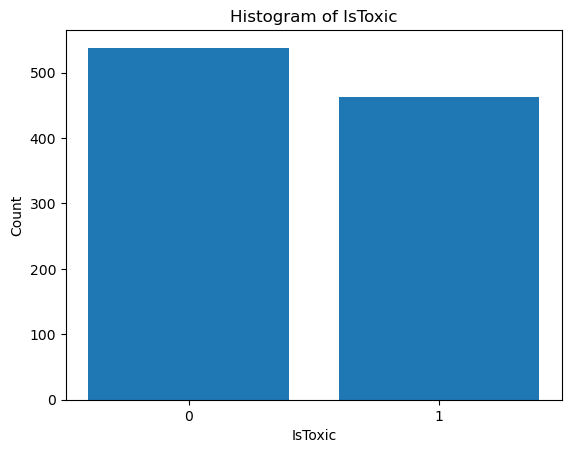

In [9]:
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('IsToxic')
plt.ylabel('Count')
plt.title('Histogram of IsToxic')
plt.show()

## 5. Modelling ##

In [34]:
# Split data into X and y
X = adjusted_data["Text"]

y = adjusted_data["IsToxic"]

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)   

In [36]:
vocab_size=600
oov_tok='<OOV>'
max_len=200

In [37]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(X_train)

In [39]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'to': 3,
 'and': 4,
 'a': 5,
 'of': 6,
 'is': 7,
 'that': 8,
 'you': 9,
 'in': 10,
 'i': 11,
 'this': 12,
 'are': 13,
 'it': 14,
 'was': 15,
 'people': 16,
 '\xa0': 17,
 'he': 18,
 'they': 19,
 'black': 20,
 'for': 21,
 'not': 22,
 'be': 23,
 'with': 24,
 'have': 25,
 'all': 26,
 'on': 27,
 'if': 28,
 'but': 29,
 'police': 30,
 'what': 31,
 'like': 32,
 'his': 33,
 'just': 34,
 'do': 35,
 'get': 36,
 'your': 37,
 'as': 38,
 'so': 39,
 'by': 40,
 'about': 41,
 'white': 42,
 'no': 43,
 'there': 44,
 'would': 45,
 'at': 46,
 'out': 47,
 'or': 48,
 'we': 49,
 'brown': 50,
 'their': 51,
 'up': 52,
 'them': 53,
 'who': 54,
 'shot': 55,
 'officer': 56,
 'an': 57,
 'will': 58,
 'when': 59,
 'more': 60,
 'from': 61,
 'how': 62,
 'should': 63,
 'cop': 64,
 'because': 65,
 'video': 66,
 'my': 67,
 'one': 68,
 'can': 69,
 'did': 70,
 'why': 71,
 "don't": 72,
 'these': 73,
 'him': 74,
 'then': 75,
 'know': 76,
 'me': 77,
 'man': 78,
 'being': 79,
 'has': 80,
 'blacks': 81,


In [40]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(X_train)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [41]:
Testing_seq=token.texts_to_sequences(X_test)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [42]:
model = tf.keras.models.Sequential([
    
])